In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
plt.style.use('ggplot')
df=pd.read_csv('master.csv')

In [3]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [4]:

df.count()

country               27820
year                  27820
sex                   27820
age                   27820
suicides_no           27820
population            27820
suicides/100k pop     27820
country-year          27820
HDI for year           8364
 gdp_for_year ($)     27820
gdp_per_capita ($)    27820
generation            27820
dtype: int64

In [5]:
df.sample()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
15885,Malta,1991,female,35-54 years,1,49800,2.01,Malta1991,NaN,"2,750,041,434",8313,Boomers


In [6]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
df.shape

(27820, 12)

In [9]:
df.iloc[:,1:5].describe()

,year,suicides_no
count,27820.000000,27820.000000
mean,2001.258375,242.574407
std,8.469055,902.047917
min,1985.000000,0.000000
25%,1995.000000,3.000000
50%,2002.000000,25.000000
75%,2008.000000,131.000000
max,2016.000000,22338.000000


In [10]:
# Drop duplicate rows across all columns
df = df.drop_duplicates()

In [11]:
# Replace missing values with "0" in column: 'country'
df = df.fillna({'country': "0", 'sex': "0", 'age': "0", ' gdp_for_year ($) ': "0", 'generation': "0"})

In [12]:
 #Convert text to lowercase in columns: 'country', 'sex' and 4 other columns
df['country'] = df['country'].str.lower()
df['sex'] = df['sex'].str.lower()
df['age'] = df['age'].str.lower()
df['country-year'] = df['country-year'].str.lower()
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].str.lower()
df['generation'] = df['generation'].str.lower()

In [13]:
# Capitalize the first character in columns: 'country', 'sex' and 5 other columns
df['country'] = df['country'].str.capitalize()
df['sex'] = df['sex'].str.capitalize()
df['age'] = df['age'].str.capitalize()
df['country-year'] = df['country-year'].str.capitalize()
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].str.capitalize()
df['generation'] = df['generation'].str.capitalize()
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,Male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation x
1,Albania,1987,Male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,Female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation x
3,Albania,1987,Male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.i. generation
4,Albania,1987,Male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,Female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation x
27816,Uzbekistan,2014,Female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,Male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation z
27818,Uzbekistan,2014,Female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation z


In [14]:
# Rename column 'gdp_per_capita ($)' to 'Gdp_per_capital'
df = df.rename(columns={'gdp_per_capita ($)': 'Gdp_per_capital'})
# Rename column ' gdp_for_year ($) ' to 'Gdp_for_year'
df = df.rename(columns={' gdp_for_year ($) ': 'Gdp_for_year'})

In [15]:
df.isnull().any()

country              False
year                 False
sex                  False
age                  False
suicides_no          False
population           False
suicides/100k pop    False
country-year         False
HDI for year          True
Gdp_for_year         False
Gdp_per_capital      False
generation           False
dtype: bool

In [16]:
df.isnull().sum()

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides/100k pop        0
country-year             0
HDI for year         19456
Gdp_for_year             0
Gdp_per_capital          0
generation               0
dtype: int64

In [17]:
df = df.dropna()

In [18]:
#As you can see, most of the HDIForYear value is empty. That's why I want this value deleted.
df=df.drop(['HDI for year','country-year'],axis=1)

According to this plot numbers of suicides had been decreasing overall


Text(0, 0.5, 'suicides_no')

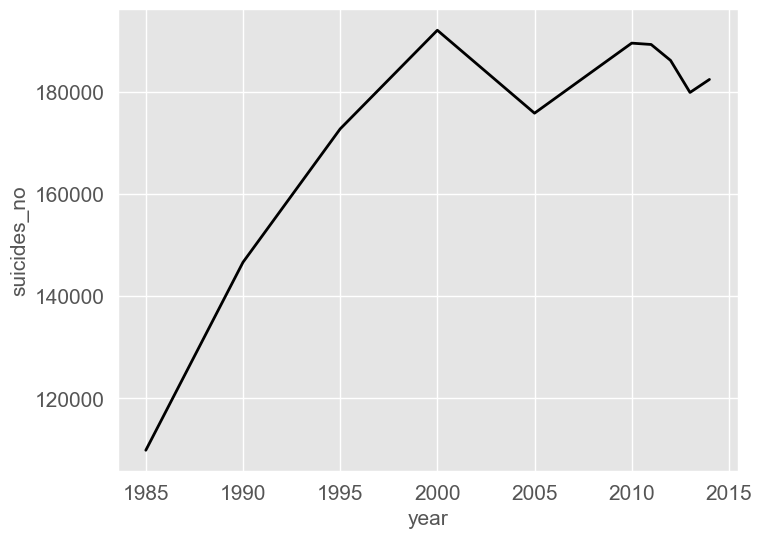

In [19]:
## Suicides number curve (1985-2016)
ns = df['suicides_no'].groupby(df.year).sum()
ns.plot(figsize=(8,6), linewidth=2, fontsize=15,color='black')
plt.xlabel('year', fontsize=15)
plt.ylabel('suicides_no',fontsize=15)

In [20]:
df.replace('', 0, inplace=True)

# Fill missing values in multiple columns with 0
columns_to_fill = ['suicides/100k pop', 'year']
df[columns_to_fill] = df[columns_to_fill].fillna(0)

In [21]:
# Define a mapping dictionary
sex_mapping = {'male': 0, 'female': 1}
# Map the values in the 'sex' column using the mapping dictionary
df['sex_numeric'] = df['sex'].map(sex_mapping)
print(df.head())

    country  year     sex          age  suicides_no  population  \
72  Albania  1995    Male  25-34 years           13      232900   
73  Albania  1995    Male  55-74 years            9      178000   
74  Albania  1995  Female    75+ years            2       40800   
75  Albania  1995  Female  15-24 years           13      283500   
76  Albania  1995    Male  15-24 years           11      241200   

    suicides/100k pop   Gdp_for_year  Gdp_per_capital       generation  \
72               5.58  2,424,499,009              835     Generation x   
73               5.06  2,424,499,009              835           Silent   
74               4.90  2,424,499,009              835  G.i. generation   
75               4.59  2,424,499,009              835     Generation x   
76               4.56  2,424,499,009              835     Generation x   

    sex_numeric  
72          NaN  
73          NaN  
74          NaN  
75          NaN  
76          NaN  


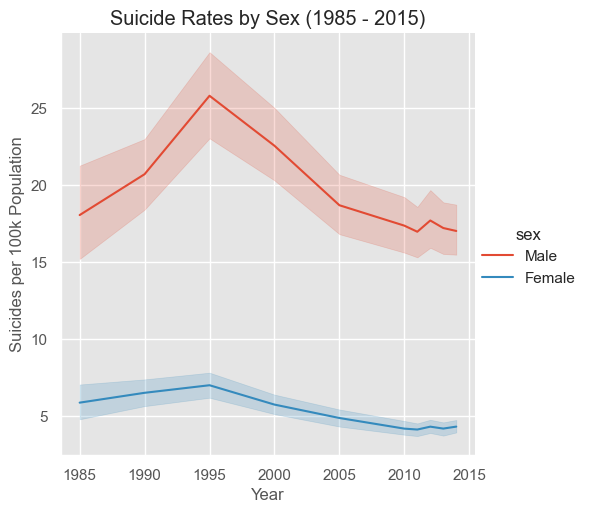

In [22]:
## Mean suicides number by gender and 100k population
sns.relplot(x="year", y="suicides/100k pop", hue="sex", data=df, kind="line")
plt.title("Suicide Rates by Sex (1985 - 2015)")
plt.xlabel("Year")
plt.ylabel("Suicides per 100k Population")
plt.show()


In [23]:
# Define a mapping dictionary for age
age_mapping = {
    '0-4': 0,
    '5-9': 1,
    '10-14': 2,
    '15-19': 3,
    '20-24': 4,
    '25-29': 5,
    '30-34': 6,
    '35-39': 7,
    '40-44': 8,
    '45-49': 9,
    '50-54': 10,
    '55-59': 11,
    '60-64': 12,
    '65-69': 13,
    '70-74': 14,
    '75+': 15
}
# Map the age values to numeric values
df['age_numeric'] = df['age'].map(age_mapping)

# Display the DataFrame to verify the changes
print(df.head())

    country  year     sex          age  suicides_no  population  \
72  Albania  1995    Male  25-34 years           13      232900   
73  Albania  1995    Male  55-74 years            9      178000   
74  Albania  1995  Female    75+ years            2       40800   
75  Albania  1995  Female  15-24 years           13      283500   
76  Albania  1995    Male  15-24 years           11      241200   

    suicides/100k pop   Gdp_for_year  Gdp_per_capital       generation  \
72               5.58  2,424,499,009              835     Generation x   
73               5.06  2,424,499,009              835           Silent   
74               4.90  2,424,499,009              835  G.i. generation   
75               4.59  2,424,499,009              835     Generation x   
76               4.56  2,424,499,009              835     Generation x   

    sex_numeric  age_numeric  
72          NaN          NaN  
73          NaN          NaN  
74          NaN          NaN  
75          NaN          NaN

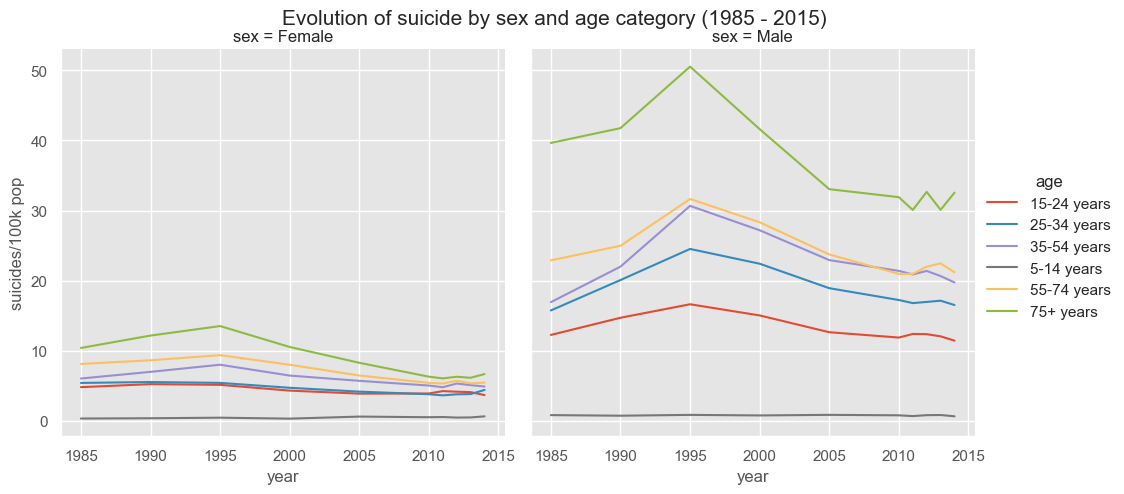

In [24]:

# Group by year, sex, and age and calculate mean suicide rates
df_grouped = df.groupby(["year", "sex", "age"])["suicides/100k pop"].mean().reset_index()

# Plotting
sns.relplot(x="year", y="suicides/100k pop", hue="age", col="sex", col_wrap=2, kind="line", data=df_grouped)
plt.subplots_adjust(top=0.9)
plt.suptitle("Evolution of suicide by sex and age category (1985 - 2015)", size=15)
plt.show()

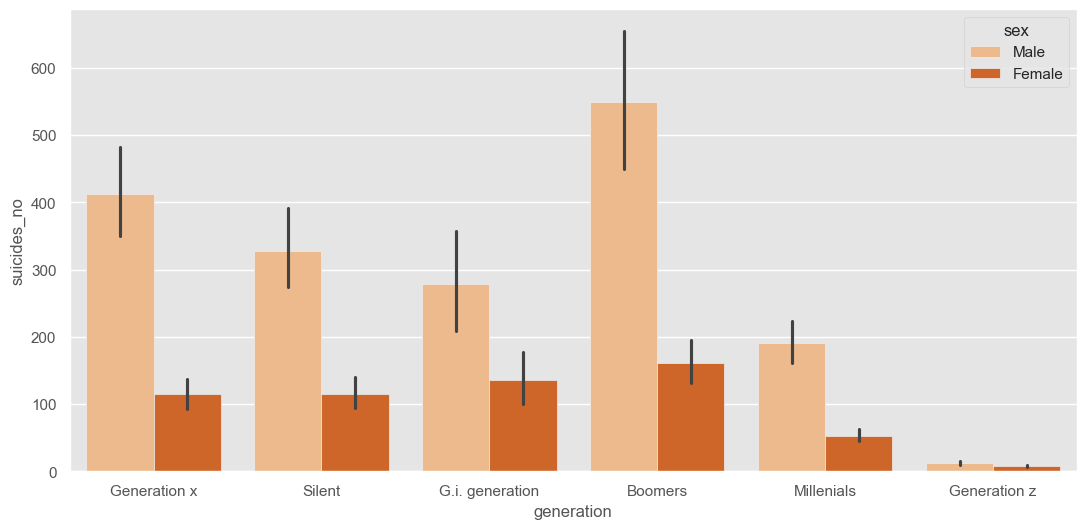

In [25]:

## Suicides number by generation and sex
f,ax = plt.subplots(1,1,figsize=(13,6))
ax = sns.barplot(x = df['generation'], y = 'suicides_no',
                  hue='sex',data=df, palette='Oranges')




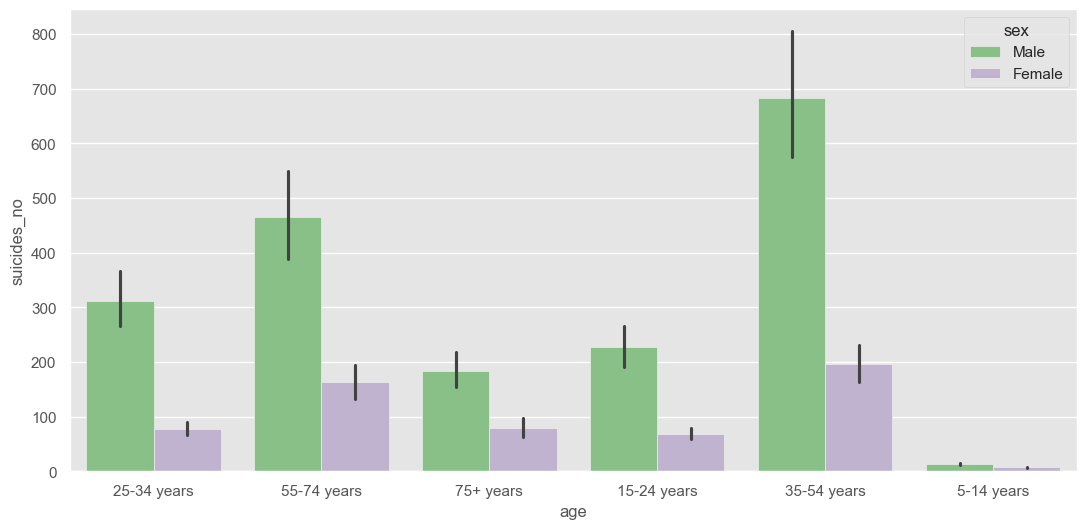

In [26]:
## Suicides number by age and sex
f,ax = plt.subplots(1,1,figsize=(13,6))
ax = sns.barplot(x = df['age'], y = 'suicides_no',
                  hue='sex',data=df, palette='Accent')


C:\Users\Admin\AppData\Local\Temp\ipykernel_10040\1923459672.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.head(20), y=data.head(20).index, palette='Spectral', ax=ax)


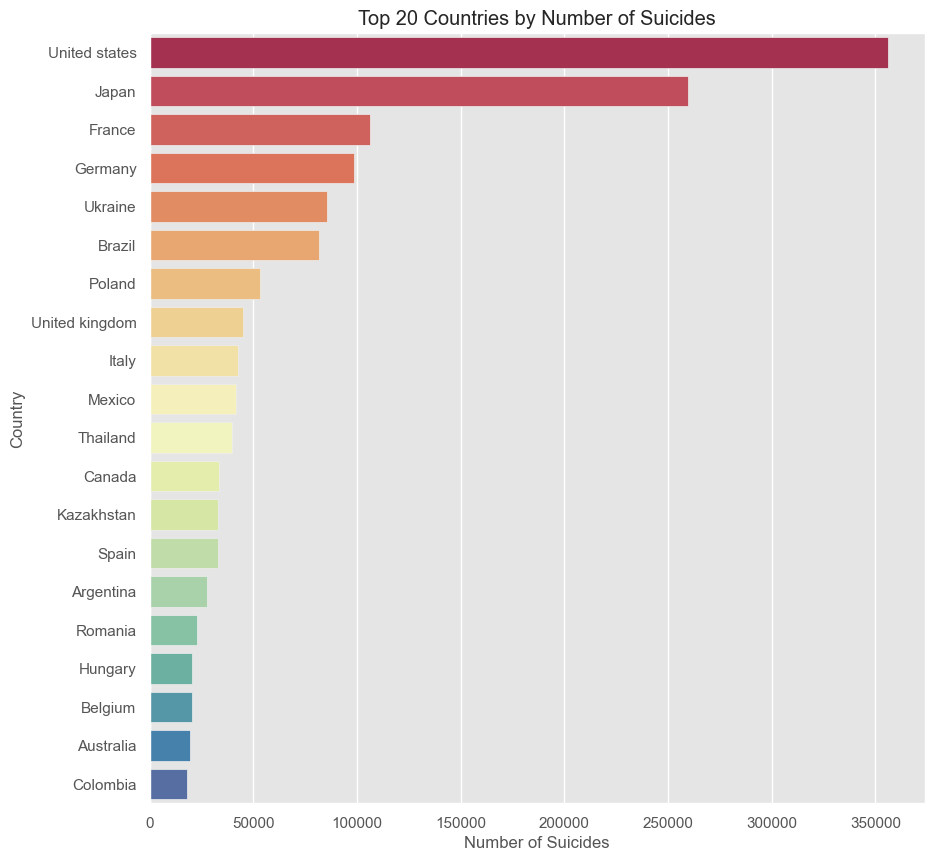

In [27]:
# Calculate the sum of suicides_no grouped by country and sort values
data = df['suicides_no'].groupby(df['country']).sum().sort_values(ascending=False)

# Create a horizontal bar plot with hue
f, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.barplot(x=data.head(20), y=data.head(20).index, palette='Spectral', ax=ax)

# Set labels and title
ax.set_xlabel('Number of Suicides')
ax.set_ylabel('Country')
ax.set_title('Top 20 Countries by Number of Suicides')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_10040\189976712.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.tail(20), y=data.tail(20).index, palette='coolwarm', ax=ax)


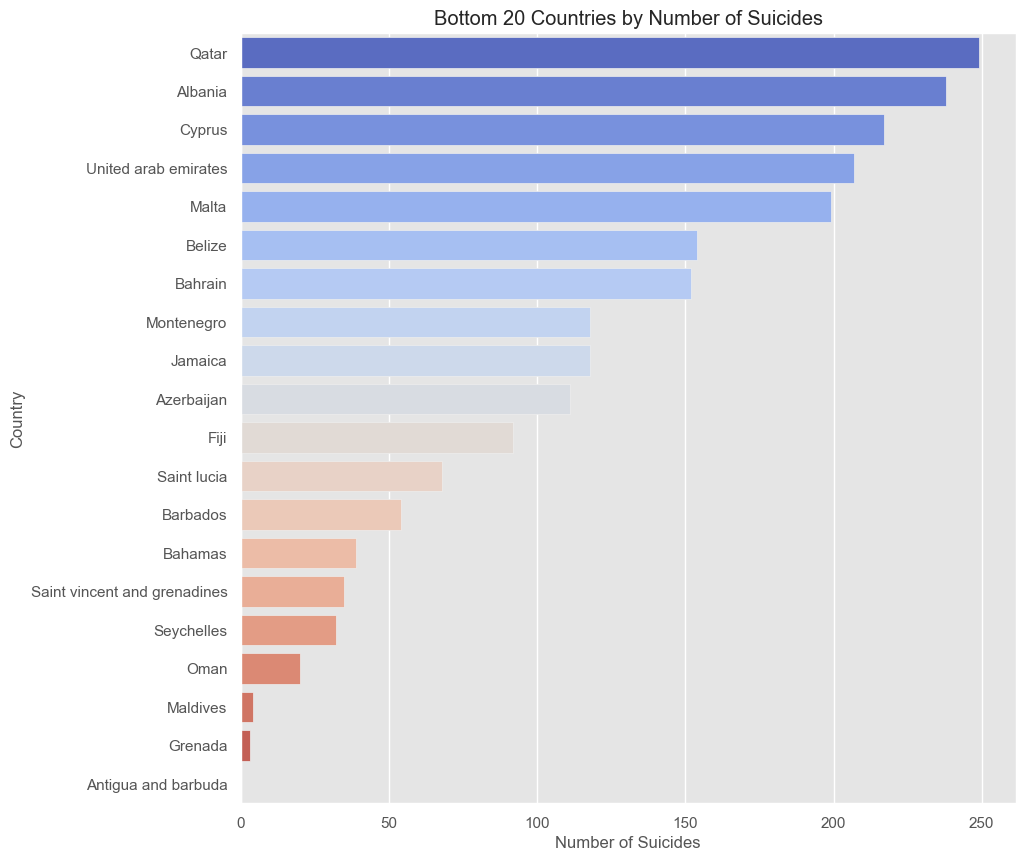

In [28]:
# Calculate the sum of suicides_no grouped by country and sort values
data = df['suicides_no'].groupby(df['country']).sum().sort_values(ascending=False)

# Assuming 'generation' is a categorical variable you want to use as hue
hue_data = df['generation'].groupby(df['country']).first()

# Create a horizontal bar plot with hue
f, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.barplot(x=data.tail(20), y=data.tail(20).index, palette='coolwarm', ax=ax)


# Set labels and title
ax.set_xlabel('Number of Suicides')
ax.set_ylabel('Country')
ax.set_title('Bottom 20 Countries by Number of Suicides')

plt.show()

In [29]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,Gdp_for_year,Gdp_per_capital,generation,sex_numeric,age_numeric
72,Albania,1995,Male,25-34 years,13,232900,5.58,"2,424,499,009",835,Generation x,NaN,NaN
73,Albania,1995,Male,55-74 years,9,178000,5.06,"2,424,499,009",835,Silent,NaN,NaN
74,Albania,1995,Female,75+ years,2,40800,4.90,"2,424,499,009",835,G.i. generation,NaN,NaN
75,Albania,1995,Female,15-24 years,13,283500,4.59,"2,424,499,009",835,Generation x,NaN,NaN
76,Albania,1995,Male,15-24 years,11,241200,4.56,"2,424,499,009",835,Generation x,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,Female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation x,NaN,NaN
27816,Uzbekistan,2014,Female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent,NaN,NaN
27817,Uzbekistan,2014,Male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation z,NaN,NaN
27818,Uzbekistan,2014,Female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation z,NaN,NaN


In [30]:
# Convert integer values in 'gdp_per_capital' and 'gdp_for_year' columns to strings
df['Gdp_per_capital'] = df['Gdp_per_capital'].astype(str)
df['Gdp_for_year'] = df['Gdp_for_year'].astype(str)




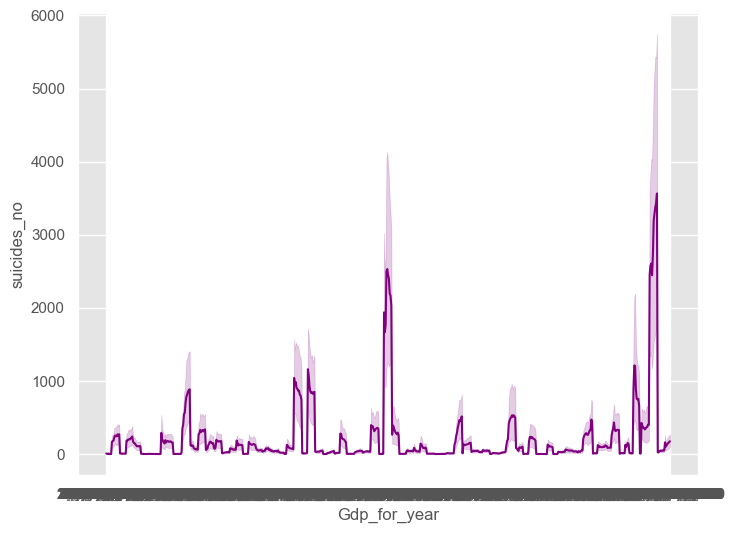

In [31]:
## Checking the relationship between gdp for year and number of suicides

f, ax = plt.subplots(1,1, figsize=(8,6))
ax = sns.lineplot(x="Gdp_for_year", y="suicides_no", data=df, color='purple',ax=ax)
# Adding labels




Text(0.5, 1.0, 'Relationship between per capital and Number of Suicides')

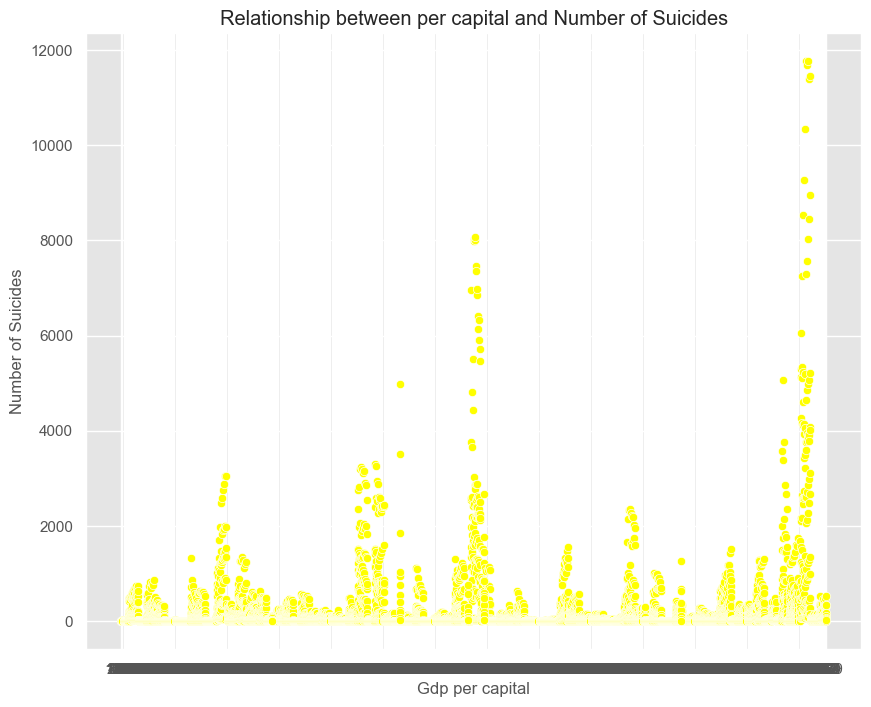

In [32]:
# Checking the relationship between gdp per capita and number of suicides
f, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.scatterplot(x="Gdp_per_capital", y="suicides_no", data=df, color='yellow')
# Adding labels
ax.set_xlabel('Gdp per capital')
ax.set_ylabel('Number of Suicides')
ax.set_title('Relationship between per capital and Number of Suicides')


In [49]:
# Define a function to map gender values
def map_gender(gender):
    if gender.lower() == "male":
        return "Male"
    elif gender.lower() == "female":
        return "Female"
    else:
        return gender  # Return the same value if it's not "male" or "female"

# Apply the mapping function to the 'sex' column
df['mapped_sex'] = df['sex'].apply(map_gender)

# Display the DataFrame with the new 'mapped_sex' column
print(df[['sex', 'mapped_sex']].head())

       sex mapped_sex
72    Male       Male
73    Male       Male
74  Female     Female
75  Female     Female
76    Male       Male


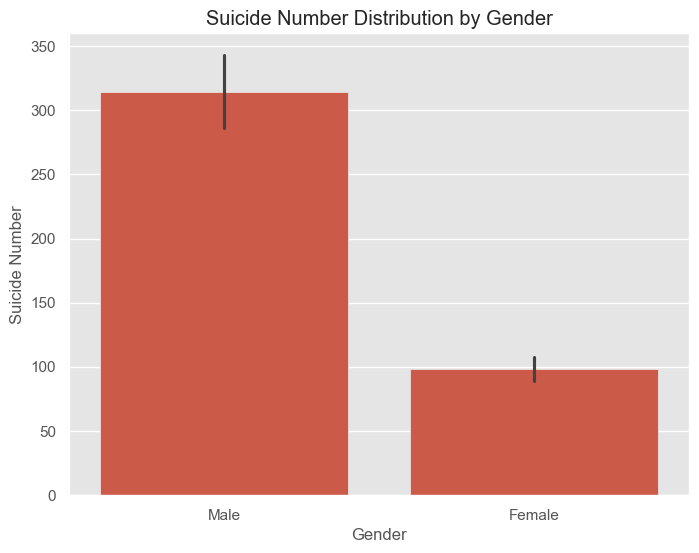

In [53]:


# Create a box plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='suicides_no', data=df)
plt.title('Suicide Number Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Suicide Number')
plt.show()

Summary : 